In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

%matplotlib inline
import matplotlib.pyplot as plt
from itertools import combinations, chain
from collections import defaultdict, Counter

['labels.csv', 'train', 'test', 'train.csv', 'sample_submission.csv']


In [2]:
df_train = pd.read_csv("../input/train.csv")
df_labels = pd.read_csv("../input/labels.csv")

In [3]:
df_train.head()

,id,attribute_ids
0,1000483014d91860,147 616 813
1,1000fe2e667721fe,51 616 734 813
2,1001614cb89646ee,776
3,10041eb49b297c08,51 671 698 813 1092
4,100501c227f8beea,13 404 492 903 1093


In [4]:
df_labels.head()

,attribute_id,attribute_name
0,0,culture::abruzzi
1,1,culture::achaemenid
2,2,culture::aegean
3,3,culture::afghan
4,4,culture::after british


In [5]:
culture_id_to_name = {row["attribute_id"]: row["attribute_name"] for i, row in df_labels.iterrows() if row["attribute_name"].startswith("culture")}
tag_id_to_name = {row["attribute_id"]: row["attribute_name"] for i, row in df_labels.iterrows() if row["attribute_name"].startswith("tag")}

In [6]:
def get_train_dict(attribute_ids):
    attribute_ids = [int(i) for i in attribute_ids.split(" ")]
    
    c = [culture_id_to_name[attribute_id] for attribute_id in attribute_ids if attribute_id in culture_id_to_name.keys()]
    t = [tag_id_to_name[attribute_id] for attribute_id in attribute_ids if attribute_id in tag_id_to_name.keys()]
    
    return {"cultures": c, "tags": t}

In [7]:
train_dict = [get_train_dict(a) for a in df_train.attribute_ids]

9


(array([2.2000e+02, 4.0440e+04, 3.0884e+04, 2.0853e+04, 1.0334e+04,
        6.2290e+03, 2.1600e+02, 4.7000e+01, 1.4000e+01]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

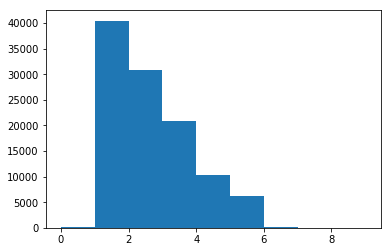

In [8]:
tag_nums = [len(d["tags"]) for d in train_dict]
print(max(tag_nums))
plt.hist(tag_nums, np.arange(0, 10))

4


(array([11872., 87679.,  9166.,   520.]),
 array([0, 1, 2, 3, 4]),
 <a list of 4 Patch objects>)

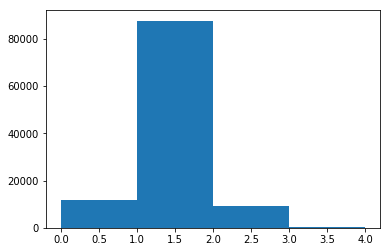

In [9]:
culture_nums = [len(d["cultures"]) for d in train_dict]
print(max(culture_nums))
plt.hist(culture_nums, np.arange(0, 5))

In [10]:
sorted_culture_pairs = Counter(chain.from_iterable([combinations(d["cultures"], 2) for d in train_dict])).most_common()
sorted_culture_pairs[:20]

[(('culture::british', 'culture::london'), 838),
 (('culture::french', 'culture::paris'), 808),
 (('culture::attic', 'culture::greek'), 676),
 (('culture::italian', 'culture::venice'), 515),
 (('culture::german', 'culture::meissen'), 402),
 (('culture::british', 'culture::staffordshire'), 388),
 (('culture::french', 'culture::sevres'), 317),
 (('culture::greek', 'culture::south italian'), 270),
 (('culture::florence', 'culture::italian'), 252),
 (('culture::italian', 'culture::naples'), 206),
 (('culture::augsburg', 'culture::german'), 173),
 (('culture::italian', 'culture::rome'), 155),
 (('culture::austrian', 'culture::vienna'), 145),
 (('culture::british', 'culture::chelsea'), 133),
 (('culture::cypriot', 'culture::roman'), 132),
 (('culture::eastern mediterranean', 'culture::greek'), 119),
 (('culture::british', 'culture::worcester'), 118),
 (('culture::apulian', 'culture::greek'), 116),
 (('culture::greek', 'culture::laconian'), 116),
 (('culture::apulian', 'culture::south italian

In [11]:
sorted_tag_pairs = Counter(chain.from_iterable([combinations(d["tags"], 2) for d in train_dict])).most_common()
sorted_tag_pairs[:20]

[(('tag::men', 'tag::women'), 5715),
 (('tag::flowers', 'tag::leaves'), 3169),
 (('tag::men', 'tag::portraits'), 2881),
 (('tag::portraits', 'tag::women'), 2569),
 (('tag::actresses', 'tag::women'), 1442),
 (('tag::men', 'tag::trees'), 1347),
 (('tag::inscriptions', 'tag::men'), 1347),
 (('tag::men', 'tag::profiles'), 1295),
 (('tag::actresses', 'tag::portraits'), 1279),
 (('tag::horse riding', 'tag::men'), 1087),
 (('tag::flowers', 'tag::textile fragments'), 1019),
 (('tag::landscapes', 'tag::trees'), 977),
 (('tag::trees', 'tag::women'), 906),
 (('tag::profiles', 'tag::women'), 835),
 (('tag::birds', 'tag::flowers'), 794),
 (('tag::leaves', 'tag::textile fragments'), 772),
 (('tag::flowers', 'tag::utilitarian objects'), 729),
 (('tag::houses', 'tag::trees'), 724),
 (('tag::inscriptions', 'tag::women'), 707),
 (('tag::horses', 'tag::men'), 700)]

In [12]:
culture_tag_pair_to_cnt = defaultdict(int)

for d in train_dict:
    for c in d["cultures"]:
        for t in d["tags"]:
            culture_tag_pair_to_cnt[(c, t)] += 1

sorted_culture_tag_pairs = sorted(culture_tag_pair_to_cnt.items(), key=lambda x: x[1], reverse=True)
sorted_culture_tag_pairs[:20]

[(('culture::french', 'tag::men'), 3486),
 (('culture::american', 'tag::women'), 2607),
 (('culture::french', 'tag::women'), 2460),
 (('culture::american', 'tag::portraits'), 2396),
 (('culture::british', 'tag::men'), 2117),
 (('culture::italian', 'tag::men'), 1982),
 (('culture::french', 'tag::flowers'), 1947),
 (('culture::american', 'tag::men'), 1762),
 (('culture::japan', 'tag::men'), 1448),
 (('culture::american', 'tag::actresses'), 1446),
 (('culture::french', 'tag::leaves'), 1425),
 (('culture::british', 'tag::women'), 1411),
 (('culture::german', 'tag::men'), 1329),
 (('culture::japan', 'tag::women'), 1260),
 (('culture::italian', 'tag::women'), 1147),
 (('culture::egyptian', 'tag::hieroglyphs'), 1018),
 (('culture::japan', 'tag::trees'), 950),
 (('culture::french', 'tag::portraits'), 833),
 (('culture::japan', 'tag::flowers'), 809),
 (('culture::british', 'tag::flowers'), 793)]